# 드라이브 마운트

**Content_difficulty_skill.csv 를 요약한 파일이
Contetn_skill.csv 이므로 두개의 파일만 사용하면 된다.**

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

# 연합모델

## content_skill.csv

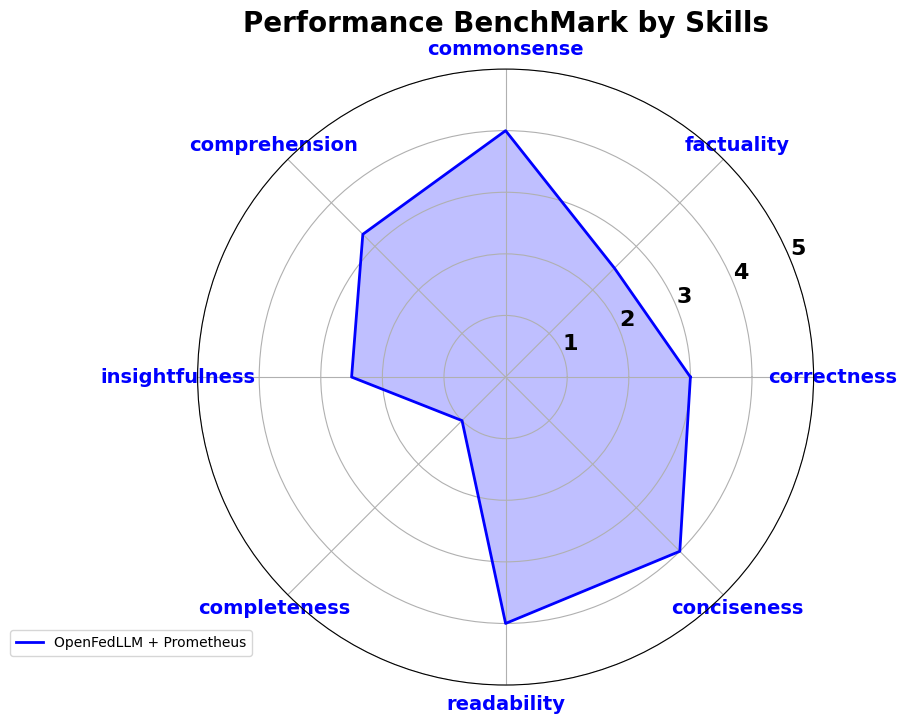

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일을 로드합니다.
file_path_fed1 = "/content/drive/MyDrive/content_skill_fed.csv"  # 새로 업로드된 파일 경로로 변경
data = pd.read_csv(file_path_fed1)

# 성능 지표 추출
categories = ['correctness', 'factuality', 'commonsense', 'comprehension',
              'insightfulness', 'completeness', 'readability', 'conciseness']

filtered_data = data[data['skill'].isin(categories)]
values = filtered_data['avg'].values

# 레이더 차트를 생성합니다.
num_vars = len(categories)

# 각 성능 지표에 대한 각도를 계산합니다.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 차트를 원형으로 만들기 위해 시작 값을 끝에 추가합니다.
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# 플로팅
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 데이터를 플롯하고 채웁니다.
ax.plot(angles, values, color='b', linewidth=2, linestyle='solid', label='OpenFedLLM + Prometheus')
ax.fill(angles, values, color='b', alpha=0.25)

# 각 축의 레이블을 설정합니다.
ax.set_yticks(np.arange(1, 6, 1))  # 1칸에 1점씩 표시되도록 수정
ax.set_yticklabels(range(1, 6), fontsize=16, weight='bold')
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{category}' for category in categories], fontsize=14, weight='bold', color='blue')

# 범례 추가
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 제목 설정
plt.title("Performance BenchMark by Skills", size=20, weight='bold', position=(0.5, 1.1))

# 차트를 표시합니다.
plt.show()

## Content_domain.csv

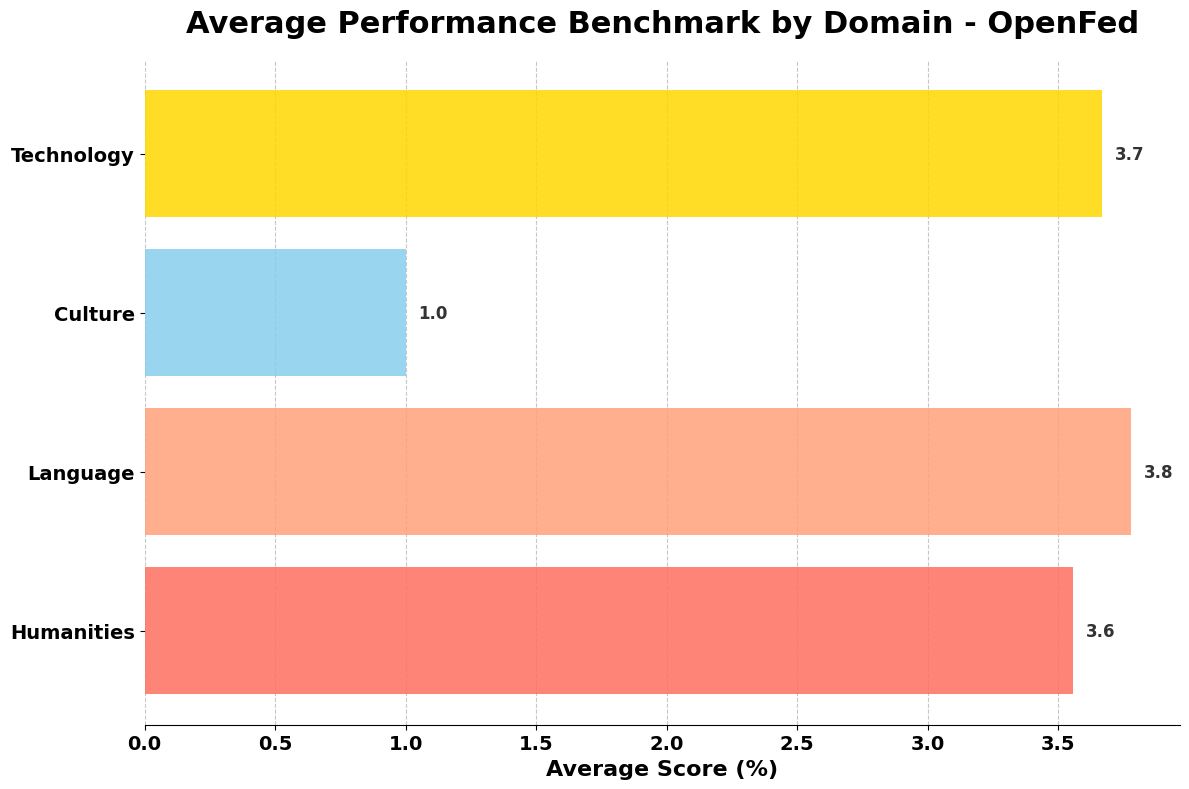

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path_fed2 = "/content/drive/MyDrive/content_domain_fed.csv"
data = pd.read_csv(file_path_fed2)


categories = ['Humanities', 'Language', 'Culture', 'Technology']


filtered_data = data[data['domain'].isin(categories)]
values = filtered_data['avg'].values


fig, ax = plt.subplots(figsize=(12, 8))


bars = ax.barh(categories, values, color=['#FF6F61', '#FFA07A', '#87CEEB', '#FFD700'], alpha=0.85)


for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
            va='center', ha='left', fontsize=12, weight='bold', color='#333333')


ax.set_xlabel('Average Score (%)', fontsize=16, weight='bold')
ax.set_title('Average Performance Benchmark by Domain - OpenFed', fontsize=22, weight='bold', pad=20)


ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


# 단독 모델

## content_skill.csv

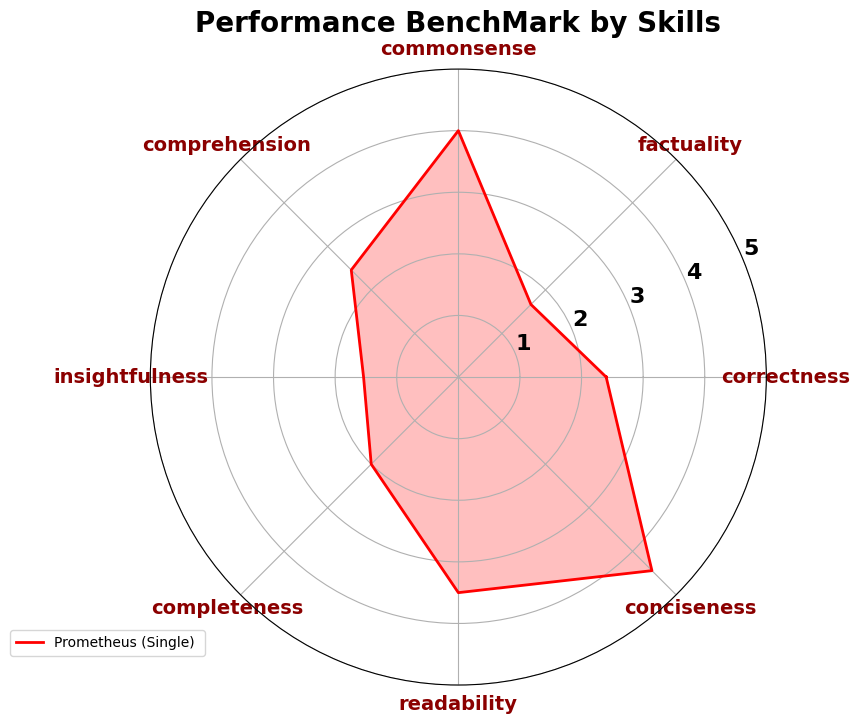

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path_single1 = "/content/drive/MyDrive/content_skill_single.csv"
data = pd.read_csv(file_path_single1)

categories = ['correctness', 'factuality', 'commonsense', 'comprehension',
              'insightfulness', 'completeness', 'readability', 'conciseness']

filtered_data = data[data['skill'].isin(categories)]
values = filtered_data['avg'].values

num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values = np.concatenate((values, [values[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='r', linewidth=2, linestyle='solid', label='Prometheus (Single) ')
ax.fill(angles, values, color='r', alpha=0.25)

ax.set_yticks(np.arange(1, 6, 1))
ax.set_yticklabels(range(1, 6), fontsize=16, weight='bold')
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{category}' for category in categories], fontsize=14, weight='bold', color='darkred')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Performance BenchMark by Skills", size=20, weight='bold', position=(0.5, 1.1))

plt.show()

## Content_domain.csv

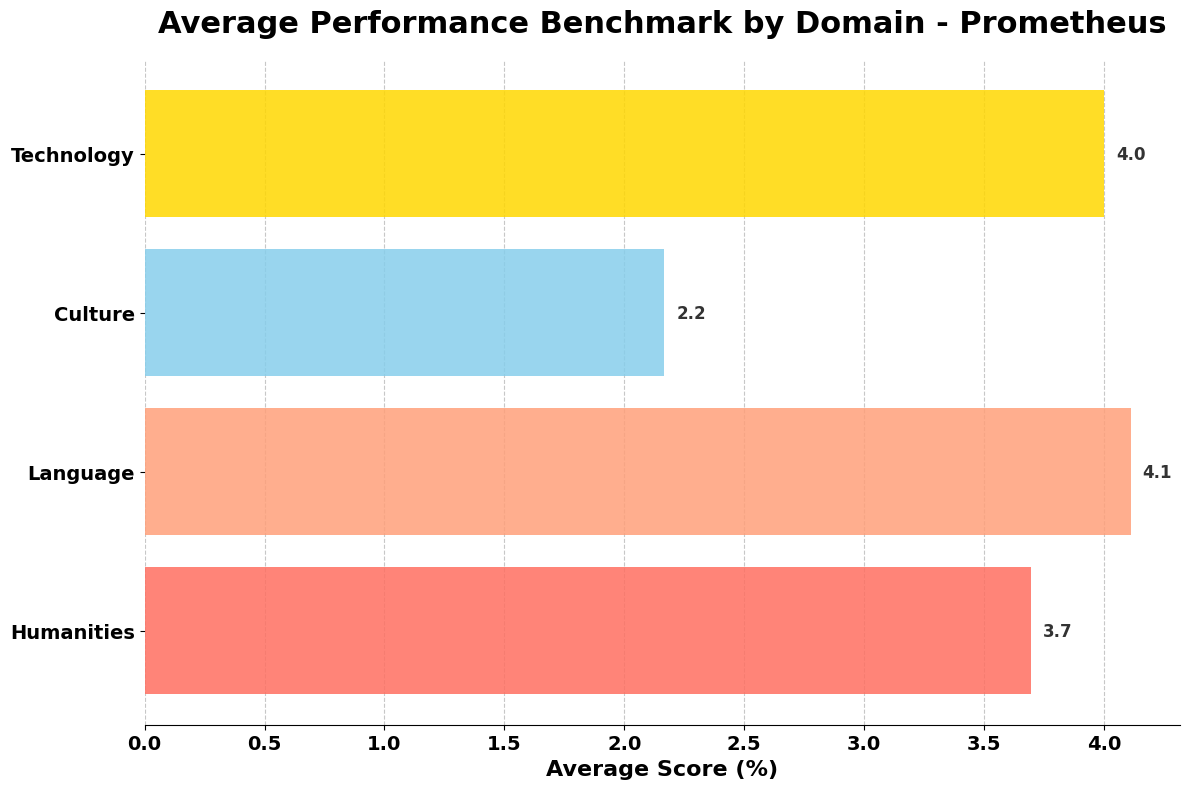

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path_fed2 = "/content/drive/MyDrive/content_domain_single.csv"
data = pd.read_csv(file_path_fed2)


categories = ['Humanities', 'Language', 'Culture', 'Technology']


filtered_data = data[data['domain'].isin(categories)]
values = filtered_data['avg'].values


fig, ax = plt.subplots(figsize=(12, 8))


bars = ax.barh(categories, values, color=['#FF6F61', '#FFA07A', '#87CEEB', '#FFD700'], alpha=0.85)


for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
            va='center', ha='left', fontsize=12, weight='bold', color='#333333')


ax.set_xlabel('Average Score (%)', fontsize=16, weight='bold')
ax.set_title('Average Performance Benchmark by Domain - Prometheus', fontsize=22, weight='bold', pad=20)


ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


# 단독/연합 모델 비교

## Skill 비교

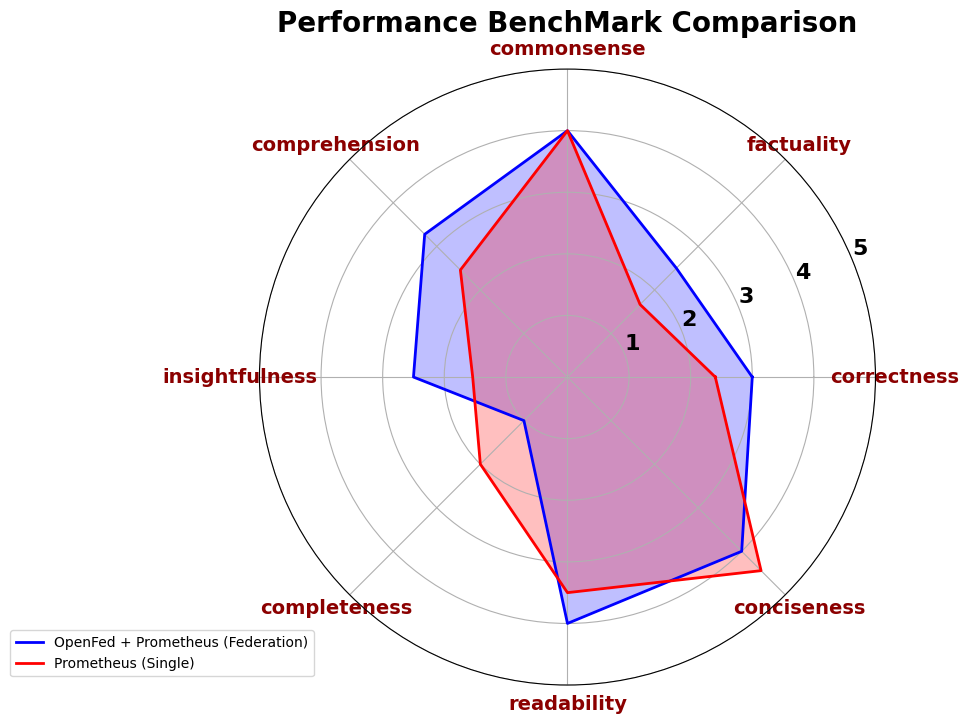

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path_1 = "/content/drive/MyDrive/content_skill_fed.csv"
file_path_2 = "/content/drive/MyDrive/content_skill_single.csv"

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

categories = ['correctness', 'factuality', 'commonsense', 'comprehension',
              'insightfulness', 'completeness', 'readability', 'conciseness']

filtered_data_1 = data_1[data_1['skill'].isin(categories)]
values_1 = filtered_data_1['avg'].values

filtered_data_2 = data_2[data_2['skill'].isin(categories)]
values_2 = filtered_data_2['avg'].values

num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values_1 = np.concatenate((values_1, [values_1[0]]))
values_2 = np.concatenate((values_2, [values_2[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values_1, color='b', linewidth=2, linestyle='solid', label='OpenFed + Prometheus (Federation)')
ax.fill(angles, values_1, color='b', alpha=0.25)


ax.plot(angles, values_2, color='r', linewidth=2, linestyle='solid', label='Prometheus (Single)')
ax.fill(angles, values_2, color='r', alpha=0.25)


ax.set_yticks(np.arange(1, 6, 1))
ax.set_yticklabels(range(1, 6), fontsize=16, weight='bold')
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{category}' for category in categories], fontsize=14, weight='bold', color='darkred')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Performance BenchMark Comparison", size=20, weight='bold', position=(0.5, 1.1))

plt.show()


## domain 비교

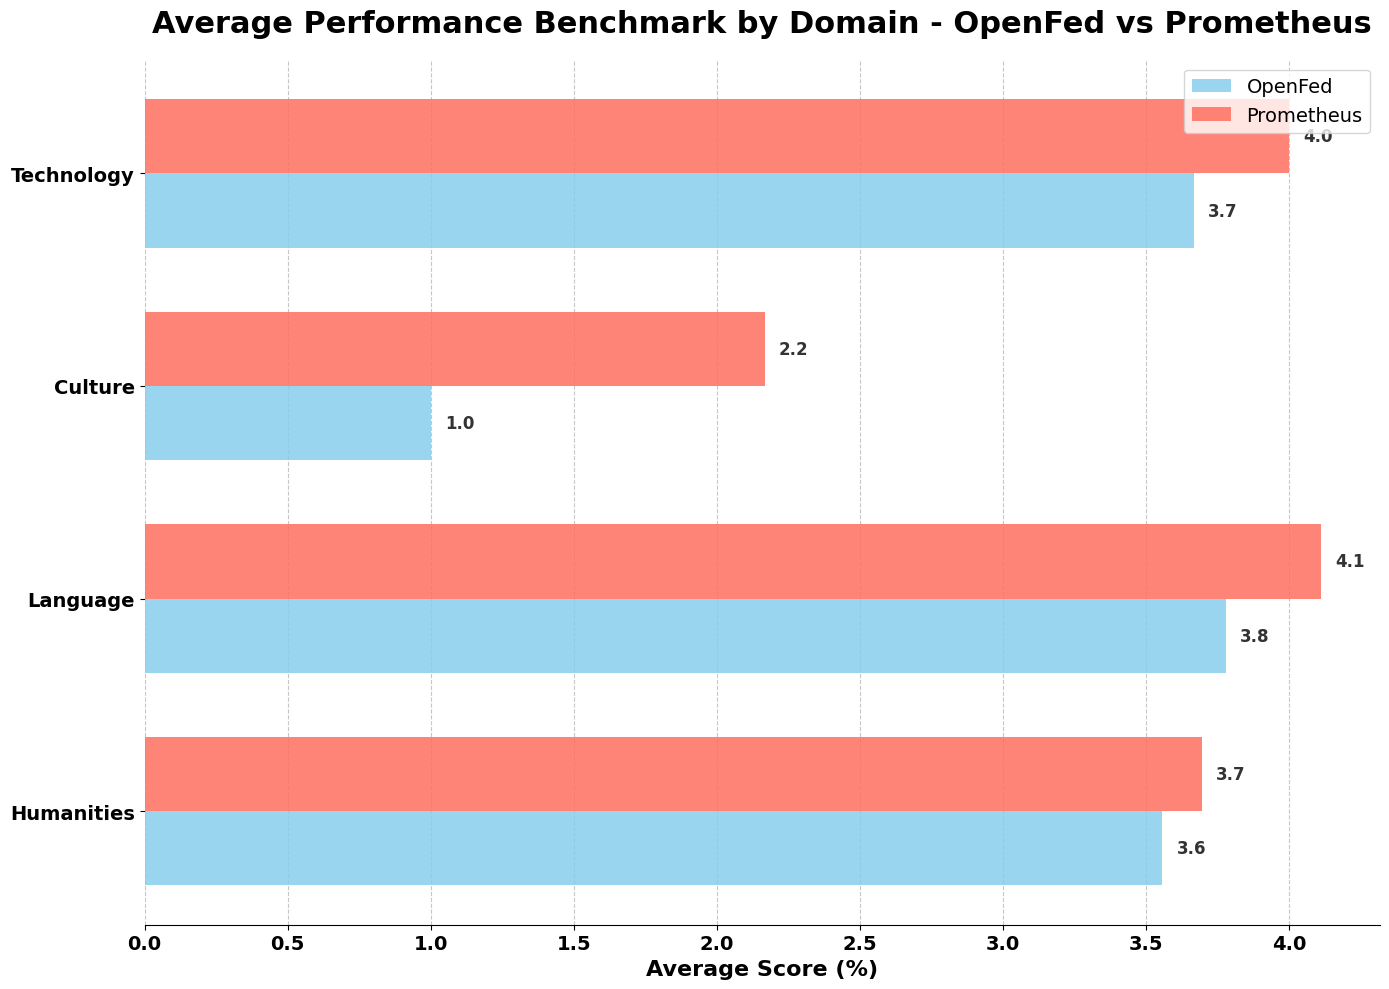

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일을 로드합니다.
file_path_fed = "/content/drive/MyDrive/content_domain_fed.csv"
file_path_single = "/content/drive/MyDrive/content_domain_single.csv"

data_fed = pd.read_csv(file_path_fed)
data_single = pd.read_csv(file_path_single)

# 성능 지표 추출
categories = ['Humanities', 'Language', 'Culture', 'Technology']

filtered_data_fed = data_fed[data_fed['domain'].isin(categories)]
values_fed = filtered_data_fed['avg'].values

filtered_data_single = data_single[data_single['domain'].isin(categories)]
values_single = filtered_data_single['avg'].values

# 막대그래프 생성
fig, ax = plt.subplots(figsize=(14, 10))

bar_width = 0.35
index = np.arange(len(categories))

# 두 데이터 세트를 나란히 표시합니다.
bars_fed = ax.barh(index, values_fed, bar_width, color='#87CEEB', label='OpenFed', alpha=0.85)
bars_single = ax.barh(index + bar_width, values_single, bar_width, color='#FF6F61', label='Prometheus', alpha=0.85)

# 각 막대에 레이블 추가
for bar, value in zip(bars_fed, values_fed):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
            va='center', ha='left', fontsize=12, weight='bold', color='#333333')

for bar, value in zip(bars_single, values_single):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
            va='center', ha='left', fontsize=12, weight='bold', color='#333333')

# 축 레이블 및 타이틀 설정
ax.set_xlabel('Average Score (%)', fontsize=16, weight='bold')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(categories, fontsize=14, weight='bold')
ax.set_title('Average Performance Benchmark by Domain - OpenFed vs Prometheus', fontsize=22, weight='bold', pad=20)

# 그리드 및 축 스타일 설정
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 범례 추가
ax.legend(loc='upper right', fontsize=14)

# x축 레이블 설정
plt.xticks(fontsize=14, weight='bold')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()
